In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#getting data
da=pd.read_excel('C:/Data sets/credit card fraud data.xlsx')

In [3]:
#dataset overview
da.head()

,AcountNumber,CVV,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
0,1275734409,364,28,Male,Married,Gold,Verve,Local,129282,170919,0,Enugu
1,1271246193,401,25,Male,Single,Gold,Verve,International,574384,329353,1,Enugu
2,1242290165,266,21,Female,Married,White,Visa,International,190766,292922,0,Enugu
3,1245478185,402,26,Male,Unknown,White,Visa,Local,130395,145444,0,Ibadan
4,1258212072,334,28,Female,Married,Gold,Verve,International,685145,295990,1,Port Harcourt


In [4]:
da.tail

<bound method NDFrame.tail of        AcountNumber  CVV  CustomerAge  Gender Marital Status CardColour  \
0        1275734409  364           28    Male        Married       Gold   
1        1271246193  401           25    Male         Single       Gold   
2        1242290165  266           21  Female        Married      White   
3        1245478185  402           26    Male        Unknown      White   
4        1258212072  334           28  Female        Married       Gold   
...             ...  ...          ...     ...            ...        ...   
16443    1250026389  637           62  Female        Married       Gold   
16444    1247133695  582           20    Male       Divorced       Gold   
16445    1260545996  571           67    Male        Married      White   
16446    1267917366  528           58  Female        Unknown       Gold   
16447    1252870437  659           27    Male        Married      White   

      CardType         Domain  Amount  AverageIncomeExpendicture  Out

In [5]:
da.shape

(16448, 12)

In [6]:
da.columns

Index(['AcountNumber', 'CVV', 'CustomerAge', 'Gender', 'Marital Status',
       'CardColour', 'CardType', 'Domain', 'Amount',
       'AverageIncomeExpendicture', 'Outcome', 'Customer_City_Address'],
      dtype='object')

In [7]:
da.dtypes

AcountNumber                  int64
CVV                           int64
CustomerAge                   int64
Gender                       object
Marital Status               object
CardColour                   object
CardType                     object
Domain                       object
Amount                        int64
AverageIncomeExpendicture     int64
Outcome                       int64
Customer_City_Address        object
dtype: object

In [8]:
da.info

<bound method DataFrame.info of        AcountNumber  CVV  CustomerAge  Gender Marital Status CardColour  \
0        1275734409  364           28    Male        Married       Gold   
1        1271246193  401           25    Male         Single       Gold   
2        1242290165  266           21  Female        Married      White   
3        1245478185  402           26    Male        Unknown      White   
4        1258212072  334           28  Female        Married       Gold   
...             ...  ...          ...     ...            ...        ...   
16443    1250026389  637           62  Female        Married       Gold   
16444    1247133695  582           20    Male       Divorced       Gold   
16445    1260545996  571           67    Male        Married      White   
16446    1267917366  528           58  Female        Unknown       Gold   
16447    1252870437  659           27    Male        Married      White   

      CardType         Domain  Amount  AverageIncomeExpendicture  O

In [9]:
#duplciates
da.duplicated().sum()

0

In [10]:
#missing values
da.isna().sum()


AcountNumber                 0
CVV                          0
CustomerAge                  0
Gender                       0
Marital Status               0
CardColour                   0
CardType                     0
Domain                       0
Amount                       0
AverageIncomeExpendicture    0
Outcome                      0
Customer_City_Address        0
dtype: int64

<Axes: >

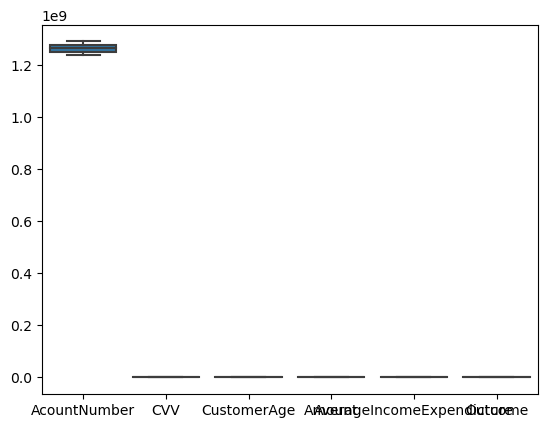

In [11]:
#outliers visually

sns.boxplot(da)


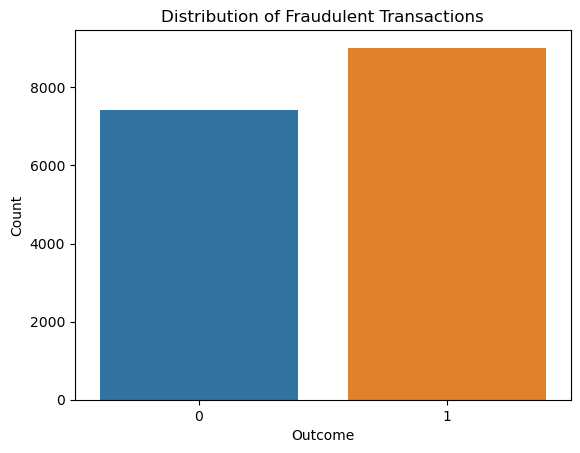

In [12]:
#visualization 
#no.of outcomes
sns.countplot(data=da, x='Outcome')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


In [13]:
#correlation, so that we ca consider what factors are strong for fraud credits
correlation= da.corr()
print(correlation["Outcome"].sort_values(ascending=False))

Outcome                      1.000000
Amount                       0.701186
AverageIncomeExpendicture    0.166956
CustomerAge                  0.157601
CVV                          0.005263
AcountNumber                -0.003290
Name: Outcome, dtype: float64


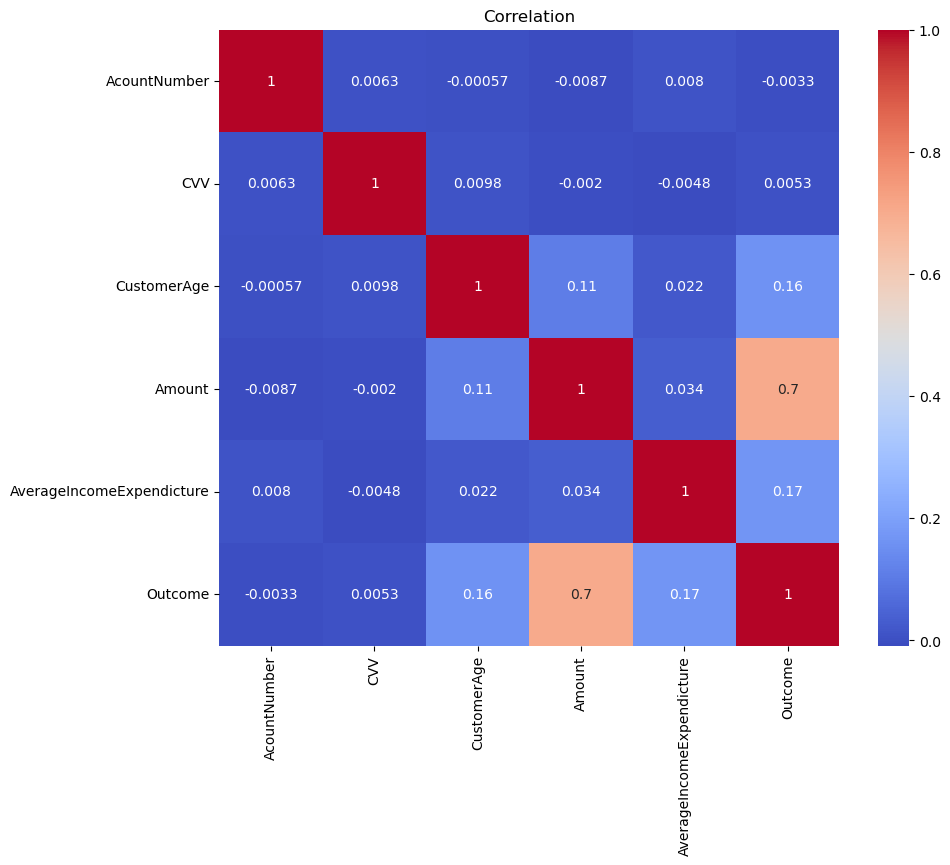

In [14]:
#Correlation visually
plt.figure(figsize=(10, 8))
sns.heatmap(da.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()

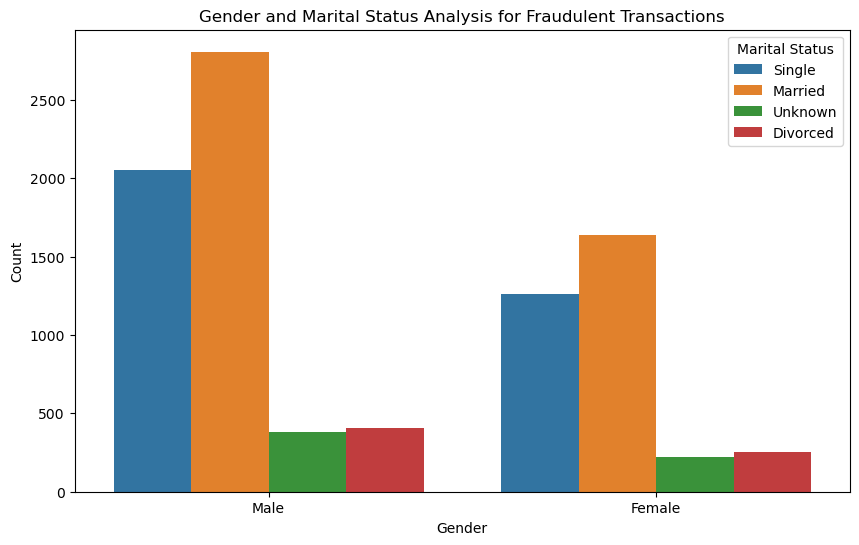

In [15]:
# bar plot showing the distribution of fraud cases based on gender and marital status.
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Marital Status', data=da[da['Outcome'] == 1])
plt.title('Gender and Marital Status Analysis for Fraudulent Transactions')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.show()


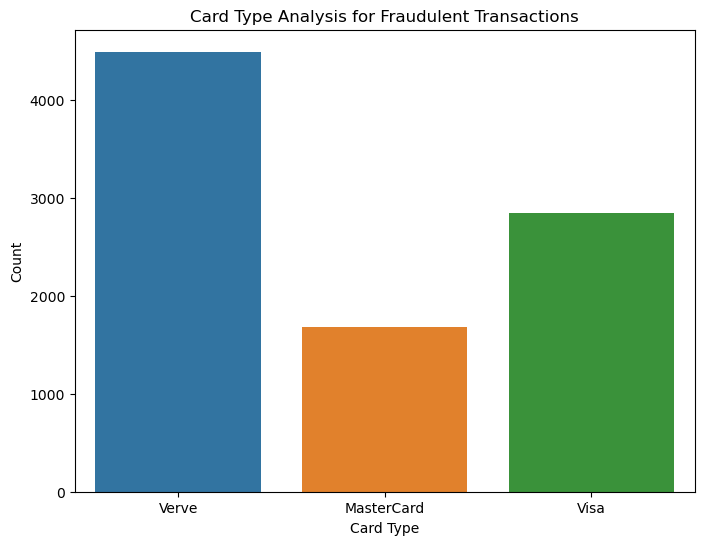

In [16]:
#Card Type Analysis for Fraudulent Transactions
plt.figure(figsize=(8, 6))
sns.countplot(x='CardType', data=da[da['Outcome'] == 1])
plt.title('Card Type Analysis for Fraudulent Transactions')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.show()


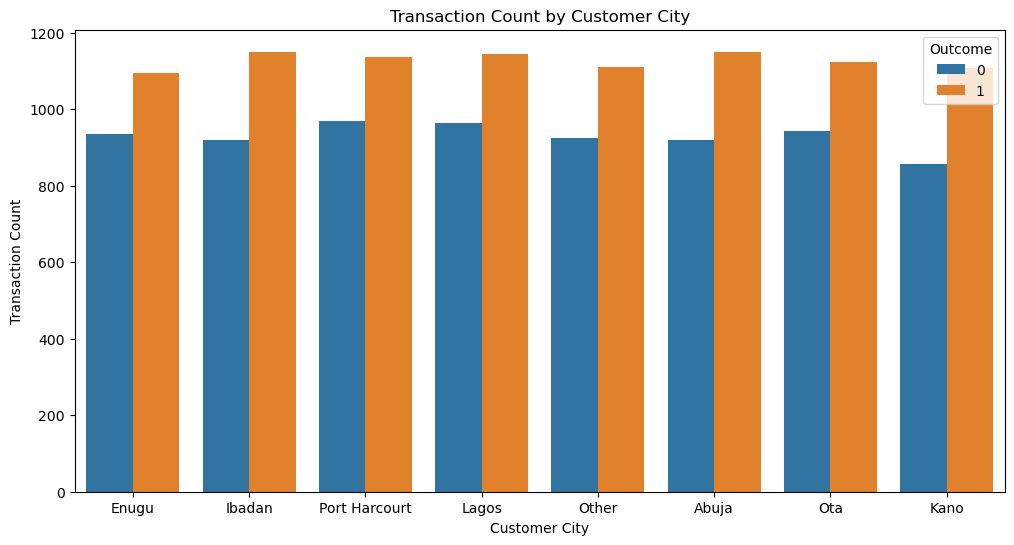

In [17]:
# Transaction Count by Customer City
plt.figure(figsize=(12, 6))
sns.countplot(x='Customer_City_Address', data=da, hue='Outcome')
plt.title('Transaction Count by Customer City')
plt.xlabel('Customer City')
plt.ylabel('Transaction Count')
plt.legend(title='Outcome', loc='upper right')
plt.show()

In [18]:
#descriptive stastics
da.describe()


,AcountNumber,CVV,CustomerAge,Amount,AverageIncomeExpendicture,Outcome
count,1.644800e+04,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000
mean,1.264766e+09,443.493191,42.861868,479845.532101,222933.665674,0.548152
std,1.477216e+07,135.191025,20.717389,262801.575424,76245.677864,0.497691
min,1.239299e+09,211.000000,18.000000,100003.000000,100023.000000,0.000000
25%,1.251950e+09,327.000000,25.000000,249370.500000,159628.750000,0.000000
50%,1.264775e+09,443.000000,36.000000,437249.500000,218497.000000,1.000000
75%,1.277500e+09,561.000000,61.000000,702202.250000,276835.500000,1.000000
max,1.290470e+09,678.000000,85.000000,999956.000000,399964.000000,1.000000


In [19]:
from sklearn.preprocessing import LabelEncoder

da.dtypes

for column in da.columns:
    if da[column].dtype == 'object':
        label= LabelEncoder()
        da[column] = label.fit_transform(da[column])
        
da.dtypes   


AcountNumber                 int64
CVV                          int64
CustomerAge                  int64
Gender                       int32
Marital Status               int32
CardColour                   int32
CardType                     int32
Domain                       int32
Amount                       int64
AverageIncomeExpendicture    int64
Outcome                      int64
Customer_City_Address        int32
dtype: object

In [20]:
#spilt the data
da.columns
X=da[['CustomerAge','Amount','AverageIncomeExpendicture' ]]
y=da['Outcome']

In [21]:
from sklearn.model_selection import train_test_split

#logistic regression 
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape

(13158, 3)

In [22]:
# activate model and fit
log=LogisticRegression()
log.fit(X_train, y_train)



LogisticRegression()

In [23]:
#predict
y_pred_lr=log.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#scores

lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", lr_accuracy)

lr_classification_report = classification_report(y_test, y_pred_lr)
print("Classification Report:",lr_classification_report)

lr_confusion_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:",lr_confusion_matrix)

Accuracy: 0.8449848024316109
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1447
           1       0.88      0.83      0.86      1843

    accuracy                           0.84      3290
   macro avg       0.84      0.85      0.84      3290
weighted avg       0.85      0.84      0.85      3290

Confusion Matrix: [[1243  204]
 [ 306 1537]]


In [25]:
# Random forest 
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

ran=RandomForestClassifier()
under_sampler = RandomUnderSampler()

In [26]:

X_resampled, y_resampled = under_sampler.fit_resample(X, y)

X_train, X_test, y_train, y_test= train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)
X_train.shape



(11891, 3)

In [27]:
#fit
ran=RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                          n_estimators=100)

ran.fit(X_train,y_train)



RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [28]:
#predict
y_pred_rf=ran.predict(X_test)



In [29]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", rf_accuracy)

rf_classification_report = classification_report(y_test, y_pred_rf)
print("Classification Report:",rf_classification_report)

rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:",rf_confusion_matrix)


Accuracy: 0.8866464850319542
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.96      0.89      1497
           1       0.95      0.82      0.88      1476

    accuracy                           0.89      2973
   macro avg       0.89      0.89      0.89      2973
weighted avg       0.89      0.89      0.89      2973

Confusion Matrix: [[1433   64]
 [ 273 1203]]


In [30]:
sample = np.array([[30,1921611,324218]])
prediction= ran.predict(sample)

print("Predicted outcome:", prediction)

Predicted outcome: [1]


In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [32]:
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

In [33]:
adaboost.fit(X_train, y_train)


AdaBoostClassifier(random_state=42)

In [34]:

y_pred_ad=adaboost.predict(X_test)



In [35]:
rf_accuracy = accuracy_score(y_test, y_pred_ad)
print("Accuracy:", rf_accuracy)

rf_classification_report = classification_report(y_test, y_pred_ad)
print("Classification Report:",rf_classification_report)

rf_confusion_matrix = confusion_matrix(y_test, y_pred_ad)
print("Confusion Matrix:",rf_confusion_matrix)



Accuracy: 0.8846283215607131
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.95      0.89      1497
           1       0.94      0.82      0.88      1476

    accuracy                           0.88      2973
   macro avg       0.89      0.88      0.88      2973
weighted avg       0.89      0.88      0.88      2973

Confusion Matrix: [[1419   78]
 [ 265 1211]]


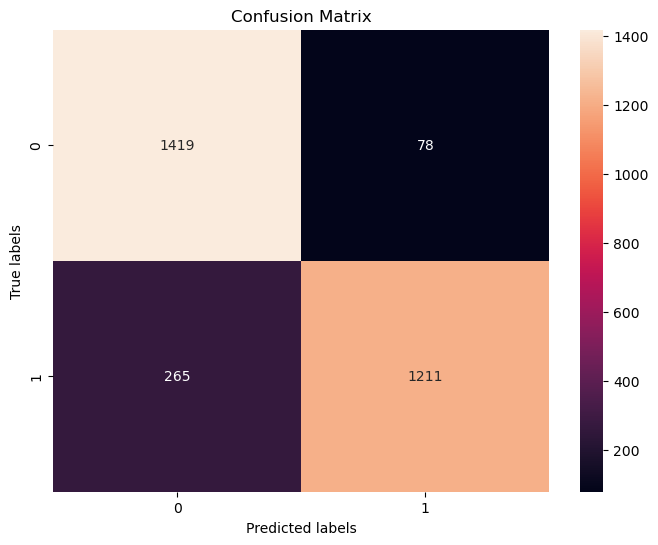

In [36]:
cm = confusion_matrix(y_test, y_pred_ad)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

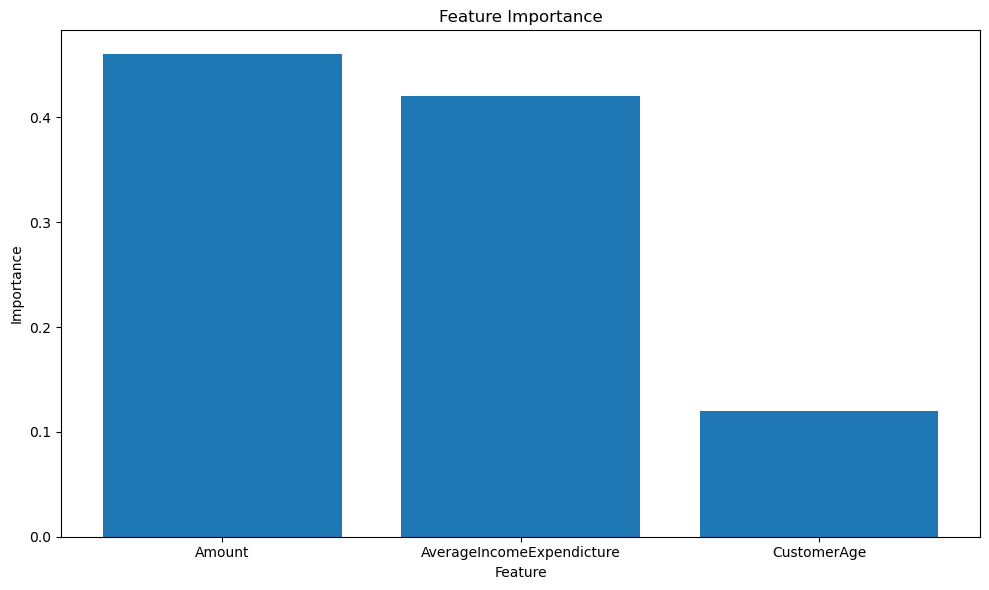

In [37]:
#finding most important features for predicting credit card fraud
feature_importances = adaboost.feature_importances_

feature_names = X.columns

#Sorting feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot 
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
